# Importing relevant libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

plt.style.use('fivethirtyeight')

import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px


import cufflinks as cf
cf.go_offline()


In [2]:
match_data = pd.read_csv('matches.csv')
deliveries_data = pd.read_csv('deliveries.csv')



In [3]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06/04/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07/04/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08/04/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08/04/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
match_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
match_data.isnull().sum().sort_values()

id                   0
venue                0
win_by_wickets       0
win_by_runs          0
dl_applied           0
toss_decision        0
result               0
team2                0
team1                0
date                 0
city                 0
season               0
toss_winner          0
umpire2              2
umpire1              2
winner               4
player_of_match      4
umpire3            637
dtype: int64

In [8]:
match_data.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

#### Total number of IPL matches till today:

In [9]:
#match_data.shape
print("Total number of IPL matches till today: ",match_data.shape[0])

Total number of IPL matches till today:  756


#### Matches per season:

In [10]:
match_data.season.value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

#### Renaming Teams and adding their acronyms:

In [11]:
match_data.replace(to_replace=['Delhi Daredevils','Rising Pune Supergiants'], value=['Delhi Capitals','Rising Pune Supergiant'],inplace=True)
deliveries_data.replace(to_replace=['Delhi Daredevils','Rising Pune Supergiants'],value=['Delhi Capitals','Rising Pune Supergiant'],inplace=True)

teams_dic = {'Sunrisers Hyderabad' : 'SRH', 'Mumbai Indians' : 'MI','Kolkata Knight Riders' : 'KKR',
                    'Royal Challengers Bangalore' : 'RCB','Delhi Capitals' : 'DC', 
                    'Kings XI Punjab' : 'KXIP','Chennai Super Kings' : 'CSK', 'Rajasthan Royals' : 'RR',
                     'Gujarat Lions' : 'GL', 'Deccan Chargers' : 'DEC', 'Kochi Tuskers Kerala' : 'KTK',
                     'Pune Warriors' : 'PWI', 'Rising Pune Supergiant' : 'RPS'
                     
            }


#Replacing full team names with acronyms.
match_data.replace(teams_dic,inplace=True)
deliveries_data.replace(teams_dic,inplace=True)




In [12]:
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05/04/2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06/04/2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07/04/2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08/04/2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08/04/2017,RCB,DC,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [14]:
match_data.drop('umpire3',axis=1,inplace=True)

In [15]:
match_data.shape

(756, 17)

#### Winning percentage of each teams:

In [16]:
win_percentage1 = ((match_data.winner.value_counts())/((match_data.team1.value_counts())+(match_data.team2.value_counts())))*100
win_percentage=win_percentage1.sort_values(ascending = False)
win_percentage

CSK     60.975610
MI      58.288770
SRH     53.703704
KKR     51.685393
RR      51.020408
RPS     50.000000
RCB     46.666667
KXIP    46.590909
DC      43.502825
GL      43.333333
KTK     42.857143
DEC     38.666667
PWI     26.086957
dtype: float64

In [17]:
win_percentage_df=pd.DataFrame({'Teams': list(dict(win_percentage).keys()),"Win Percentage" : list(dict(win_percentage).values())})
win_percentage_df

,Teams,Win Percentage
0,CSK,60.975610
1,MI,58.288770
2,SRH,53.703704
3,KKR,51.685393
4,RR,51.020408
5,RPS,50.000000
6,RCB,46.666667
7,KXIP,46.590909
8,DC,43.502825
9,GL,43.333333


In [18]:
win_percentage_df.iplot(kind='bar',x='Teams',y='Win Percentage',title='Winning Percentage of each teams [2008-2019].',xTitle='Teams',yTitle='Winning Percentage')

#### Number of season and matches played by each teams:

In [19]:
match_played=(match_data.team1.value_counts()+match_data.team2.value_counts()).sort_values(ascending=False)
match_played

MI      187
RCB     180
KKR     178
DC      177
KXIP    176
CSK     164
RR      147
SRH     108
DEC      75
PWI      46
RPS      30
GL       30
KTK      14
dtype: int64

In [20]:
print("Team to play maximum number of IPL matches is : ",match_played.keys()[0],match_played[0],"matches.")

Team to play maximum number of IPL matches is :  MI 187 matches.


In [21]:
match_played_df = pd.DataFrame({'Teams':list(dict(match_played).keys()),'Matches Played':list(dict(match_played).values())})
match_played_df

,Teams,Matches Played
0,MI,187
1,RCB,180
2,KKR,178
3,DC,177
4,KXIP,176
5,CSK,164
6,RR,147
7,SRH,108
8,DEC,75
9,PWI,46


In [22]:
match_played_df.iplot(kind='bar',x='Teams',y='Matches Played',xTitle='Teams',yTitle='Matches Played',title='Number of matches played by each teams:',colors='maroon')

In [23]:
varr = match_data.team1.unique()
dicti = {}
for values in varr:
    dicti[values] = 0
for season_no in  match_data.groupby('season'):
    for team in dicti:
        if team in season_no[1].team1.unique():
            dicti[team] += 1
            

            

sort_teams_dict = sorted(dicti.items(), key=lambda x: x[1], reverse=True)

for i in sort_teams_dict:
    print(i[0], i[1])

MI 12
RCB 12
KKR 12
DC 12
KXIP 12
CSK 10
RR 10
SRH 7
DEC 5
PWI 3
GL 2
RPS 2
KTK 1


In [24]:
season_by_teams = pd.DataFrame({'Teams': list(dict(sort_teams_dict).keys()),"Season Played" : list(dict(sort_teams_dict).values())})
season_by_teams

,Teams,Season Played
0,MI,12
1,RCB,12
2,KKR,12
3,DC,12
4,KXIP,12
5,CSK,10
6,RR,10
7,SRH,7
8,DEC,5
9,PWI,3


In [25]:
px.pie( season_by_teams , values='Season Played', names='Teams', title='Seasons played by each teams:',color_discrete_sequence=px.colors.sequential.solar_r)

#### (MoM) Man of the Match Analysis:

In [26]:
match_data.player_of_match.value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
P Shaw             1
CRD Fernando       1
Ishan Kishan       1
R McLaren          1
LJ Wright          1
Name: player_of_match, Length: 226, dtype: int64

In [27]:
mom_df=match_data['player_of_match'].value_counts().head(15).to_frame().reset_index().rename(columns={'index':'Players', 'player_of_match': 'MOM Count'})
mom_df

,Players,MOM Count
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,AM Rahane,12


In [28]:
mom_df.iplot(kind = 'bar' , x = 'Players' , y = 'MOM Count' , title = 'Man of the match[2008 - 2019]' , xTitle = 'Players' , yTitle = 'MOM Count',colors='black')

#### Which Team Played Where?

In [29]:
print("Till now",len(list(match_data.city.unique()))," cities hosted IPL matches.\n",list(match_data.city.unique()))


Till now 33  cities hosted IPL matches.
 ['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai', 'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi', 'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', 'Dubai', 'Mohali', 'Bengaluru']


In [30]:
match_data.city.value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Ranchi              7
Dubai               7
Abu Dhabi           7
Cuttack             7
Cape Town           7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [31]:
cities_df=match_data['city'].value_counts().to_frame().reset_index().rename(columns={'index':'Cities', 'city': 'Match Hosted'})
cities_df


,Cities,Match Hosted
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


In [32]:
cities_df.iplot(kind = 'bar' , x = 'Cities' , y = 'Match Hosted' , title = 'Cities vs No.of Match played there:' , xTitle = 'Cities' , yTitle = 'Match Hosted',colors='blue')

#### Year wise matches in particular city:

Text(0.5, 1, 'Number match in cities for particular year')

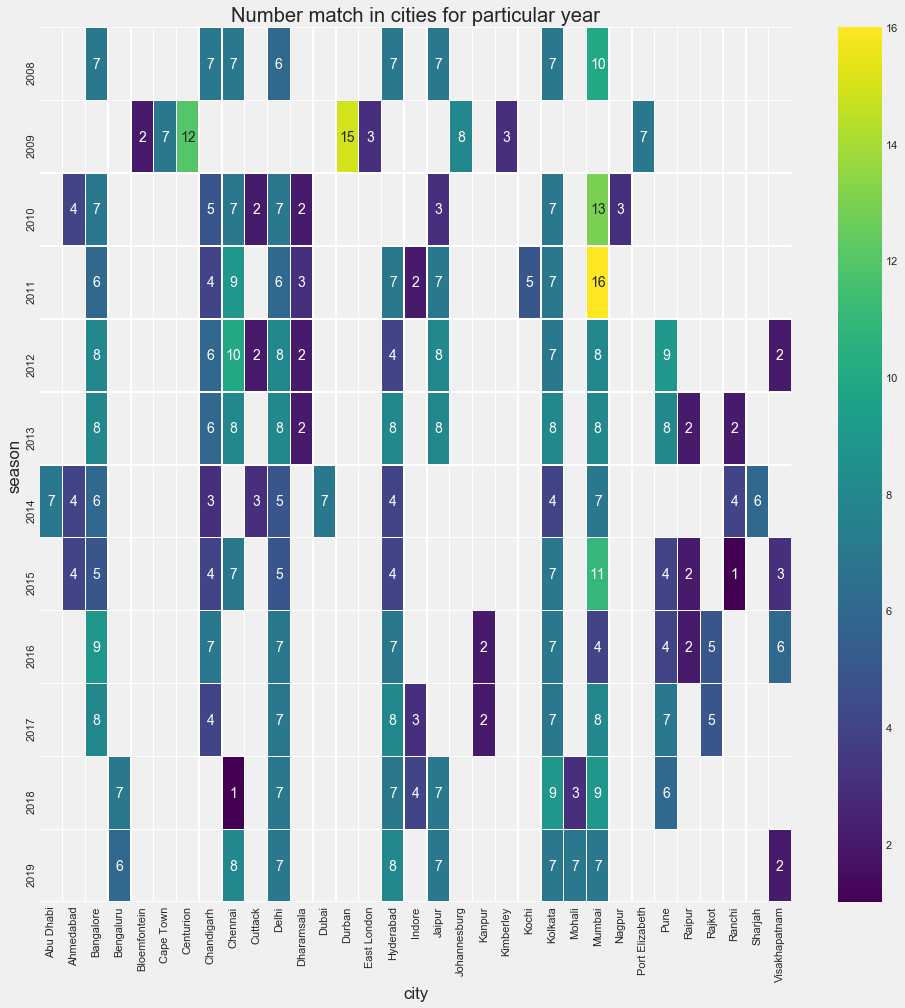

In [33]:
m_played= pd.pivot_table(match_data,values=['player_of_match'],index=['season'],columns=['city'],aggfunc='count',margins=False)

plt.figure(figsize=(15,15))
sns.heatmap(m_played['player_of_match'],linewidths=0.5 ,annot=True,cmap='viridis')
plt.title('Number match in cities for particular year')

In [34]:
def team_matches_city(city_name):
    for value in match_data.groupby('city'):
        if value[0] == city_name:
            matches = (value[1].team1.value_counts() + value[1].team2.value_counts())
            return matches

In [35]:
city_name = 'Mumbai'
matches_in_a_particular_city = team_matches_city(city_name)
matches_in_a_particular_city = matches_in_a_particular_city.to_frame().reset_index().rename(columns = {'index' : 'Team Name' , 0 : 'Count'})
matches_in_a_particular_city.sort_values(by = "Count" , ascending = False , inplace = True)
matches_in_a_particular_city

,Team Name,Count
7,MI,82
0,CSK,20
11,RR,14
1,DC,13
4,KKR,13
6,KXIP,13
9,RCB,13
8,PWI,10
2,DEC,9
12,SRH,8


In [36]:
 matches_in_a_particular_city.iplot(kind = 'bar' , x = 'Team Name' , y = 'Count' , title = 'Teams vs no of matches played in ' + city_name + '[2008 - 2019]' , xTitle = 'Teams' , yTitle = 'Count') 

#### Key players of each team:


In [37]:
def key_player(team_name):
    for value in match_data.groupby('winner'):
        if value[0] == team_name:
            impacting_player = value[1]['player_of_match'].value_counts().head(10)
            return impacting_player

In [38]:
team_name = 'RCB'
key_player_df = key_player(team_name).to_frame().reset_index().rename(columns = {'index' : 'Player' , 'player_of_match' : 'Count'})
key_player_df

,Player,Count
0,AB de Villiers,18
1,CH Gayle,17
2,V Kohli,11
3,JH Kallis,5
4,R Vinay Kumar,3
5,LRPL Taylor,2
6,A Kumble,2
7,Yuvraj Singh,2
8,UT Yadav,2
9,MK Pandey,2


In [39]:
px.pie( key_player_df , values='Count', names='Player', title="Impact of the players in RCB's victory:",color_discrete_sequence=px.colors.sequential.YlGnBu_r)

In [40]:
def modlist():
    lisname = ['RCB','RR','CSK','MI','KKR','SRH','KXIP','DC']
    for i in range(len(lisname)):
        xyz=lisname[i]
        key_player_df = key_player(xyz).to_frame().reset_index().rename(columns = {'index' : 'Player' , 'player_of_match' : 'Count'})
        print(key_player_df.iplot(kind = 'bar' , x = 'Player' , y = 'Count' , title = 'Impact of player in ' + xyz + ' victory' , xTitle = 'Player' , yTitle = 'Count') )
        
        
        

modlist()


None


None


None


None


None


None


None


None


#### Wins Chasing vs Defending:

In [41]:
def avg_win( team_name,df_name):
    for value in df_name.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times ',team_name,' won defending  :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times ',team_name,' won chasing   :' , number_of_times_given_team_win_while_chasing )
            print('Average runs by which ',team_name,' won while defending  : ' ,average_runs)
            print('Average wickets by which ',team_name,' won while chasing  : ' ,average_wickets)
            print()
            print()

In [42]:
avg_win('RCB',match_data)

Number of times  RCB  won defending  : 35
Number of times  RCB  won chasing   : 48
Average runs by which  RCB  won while defending  :  35.77142857142857
Average wickets by which  RCB  won while chasing  :  6.541666666666667




In [43]:
def avg_winlist():
    avg_win_lisname = ['RCB','RR','CSK','MI','KKR','SRH','KXIP','DC']
    for i in range(len(avg_win_lisname)):
        abc=avg_win_lisname[i]
        avg_win(abc,match_data)
        
        

avg_winlist()
        
        
        

Number of times  RCB  won defending  : 35
Number of times  RCB  won chasing   : 48
Average runs by which  RCB  won while defending  :  35.77142857142857
Average wickets by which  RCB  won while chasing  :  6.541666666666667


Number of times  RR  won defending  : 27
Number of times  RR  won chasing   : 46
Average runs by which  RR  won while defending  :  33.148148148148145
Average wickets by which  RR  won while chasing  :  5.934782608695652


Number of times  CSK  won defending  : 52
Number of times  CSK  won chasing   : 48
Average runs by which  CSK  won while defending  :  34.19230769230769
Average wickets by which  CSK  won while chasing  :  6.020833333333333


Number of times  MI  won defending  : 57
Number of times  MI  won chasing   : 50
Average runs by which  MI  won while defending  :  32.73684210526316
Average wickets by which  MI  won while chasing  :  6.14


Number of times  KKR  won defending  : 36
Number of times  KKR  won chasing   : 56
Average runs by which  KKR  won w

#### Win rates depending upon toss decision:

In [44]:
def win_rates(team_name):
    win_rates_df = match_data[(match_data['toss_winner']==team_name) & (match_data['winner']==team_name)]
    count = win_rates_df['toss_decision'].value_counts()
    win_def = count['bat']/(count['field']+count['bat'])*100
    win_chase = count['field']/(count['bat']+count['field'])*100
    print(win_rates_lisname[i])
    print(win_rates_lisname[i],"chose feilding = "+ str(count['field']))
    print(win_rates_lisname[i],"chose batting = "+ str(count['bat']))
    print(win_rates_lisname[i],"Win %age if fielding is choosen = " + str(win_chase))
    print(win_rates_lisname[i],"Win %age if batting is choosen = " + str(win_def))
    print()
    print()
    data1 = [['Fielding', win_chase], ['Batting', win_def]]
    data1 = pd.DataFrame (data1,columns=['Decision','Win_%age'])
    return(data1.iplot(kind = 'bar' , x = 'Decision' , y = 'Win_%age' , title = 'Win rates of '+win_rates_lisname[i]+' depending upon toss decision:' , xTitle = 'Decision' , yTitle = 'Win Percentage',color='navy') )
        



win_rates_lisname = ['RCB','RR','CSK','MI','KKR','SRH','KXIP','DC']
for i in range(len(win_rates_lisname)):
    temp=win_rates_lisname[i]
    win_rates(temp)


RCB
RCB chose feilding = 32
RCB chose batting = 9
RCB Win %age if fielding is choosen = 78.04878048780488
RCB Win %age if batting is choosen = 21.951219512195124




RR
RR chose feilding = 27
RR chose batting = 15
RR Win %age if fielding is choosen = 64.28571428571429
RR Win %age if batting is choosen = 35.714285714285715




CSK
CSK chose feilding = 27
CSK chose batting = 30
CSK Win %age if fielding is choosen = 47.368421052631575
CSK Win %age if batting is choosen = 52.63157894736842




MI
MI chose feilding = 31
MI chose batting = 25
MI Win %age if fielding is choosen = 55.35714285714286
MI Win %age if batting is choosen = 44.642857142857146




KKR
KKR chose feilding = 38
KKR chose batting = 15
KKR Win %age if fielding is choosen = 71.69811320754717
KKR Win %age if batting is choosen = 28.30188679245283




SRH
SRH chose feilding = 15
SRH chose batting = 8
SRH Win %age if fielding is choosen = 65.21739130434783
SRH Win %age if batting is choosen = 34.78260869565217




KXIP
KXIP chose feilding = 29
KXIP chose batting = 6
KXIP Win %age if fielding is choosen = 82.85714285714286
KXIP Win %age if batting is choosen = 17.142857142857142




DC
DC chose feilding = 30
DC chose batting = 12
DC Win %age if fielding is choosen = 71.42857142857143
DC Win %age if batting is choosen = 28.57142857142857




#### Head-to-Head

In [45]:
A , B =  input("Enter the team names separated by space : ").split(' ')
def compare_teams(A , B):
    new_df = match_data[ ( (match_data['team1'] == A) & (match_data['team2'] == B) ) | ((match_data['team1'] == B) & (match_data['team2'] == A)) ]
    new_df = new_df.winner.value_counts().to_frame().reset_index().rename( columns = {'index' : 'Team' , 'winner' : 'win %age'}) 
    
    fig = px.pie( new_df , values='win %age', names='Team', title='Head-to-Head between ' + A +' and ' + B ,color_discrete_sequence=px.colors.sequential.RdBu)
    return fig
compare_teams(A , B)

Enter the team names separated by space : CSK MI


#### Performance of team in particular year:


In [46]:
def stats_team_year(season_number , team_name):
    for value in match_data.groupby('season'):
        if value[0] == season_number:
            new_df = value[1][ ( value[1].team1 == team_name ) | ( value[1].team2 == team_name ) ]
            
            avg_win(team_name , new_df)
            return new_df

In [47]:
season_number , team_name  = input("Enter season number and team name separated by space : ").split()
season_number = int(season_number)

Enter season number and team name separated by space : 2011 RCB


In [48]:
w_df = stats_team_year(season_number , team_name)

Number of times  RCB  won defending  : 3
Number of times  RCB  won chasing   : 7
Average runs by which  RCB  won while defending  :  51.333333333333336
Average wickets by which  RCB  won while chasing  :  6.857142857142857




#### Top venues:

In [49]:
top_8_venue = match_data.venue.value_counts().head(8)
top_8_venue_data = pd.DataFrame({
    'venue': top_8_venue.index,
    'count': top_8_venue.values})
top_8_venue_data

,venue,count
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35


In [50]:
px.pie( top_8_venue_data , values='count', names='venue', title='Top 8 venues [2008 - 2019]', color_discrete_sequence=px.colors.sequential.Darkmint_r)

#### Most experienced IPL Umpires:

In [51]:
umpire1 = list(match_data.umpire1)
umpire2 = list(match_data.umpire2)


umpire1.extend(umpire2)


In [52]:
new_data = pd.DataFrame(umpire1, columns=['umpires'])
umpire_data = new_data.umpires.value_counts().head(10)
umpire_dataset = pd.DataFrame({
        'umpires': umpire_data.index,
        'count': umpire_data.values})
umpire_dataset

,umpires,count
0,S Ravi,106
1,HDPK Dharmasena,87
2,C Shamshuddin,73
3,AK Chaudhary,58
4,SJA Taufel,55
5,M Erasmus,54
6,Asad Rauf,51
7,BR Doctrove,42
8,Nitin Menon,42
9,CK Nandan,41


In [53]:
px.pie( umpire_dataset , values='count', names='umpires', title='Umpires to feature in max num of matches [2008 - 2019]', color_discrete_sequence=px.colors.sequential.YlGn_r)

#### Winner and Runner-ups count:

In [54]:
liss=[]
for val in match_data.groupby('season'):
    if val[1].tail(1).winner.values[0] == val[1].tail(1).team1.values[0]:
        runner_up = val[1].tail(1).team2.values[0]
    else:
        runner_up = val[1].tail(1).team1.values[0]
    liss.append([ val[0] , val[1].tail(1).winner.values[0] , runner_up ] )
print(liss)

[[2008, 'RR', 'CSK'], [2009, 'DEC', 'RCB'], [2010, 'CSK', 'MI'], [2011, 'CSK', 'RCB'], [2012, 'KKR', 'CSK'], [2013, 'MI', 'CSK'], [2014, 'KKR', 'KXIP'], [2015, 'MI', 'CSK'], [2016, 'SRH', 'RCB'], [2017, 'MI', 'RPS'], [2018, 'CSK', 'SRH'], [2019, 'MI', 'CSK']]


In [55]:
win_df = pd.DataFrame(liss)
win_df.rename(columns={0: 'Season', 1: 'Winner', 2: 'Runner-up'})

,Season,Winner,Runner-up
0,2008,RR,CSK
1,2009,DEC,RCB
2,2010,CSK,MI
3,2011,CSK,RCB
4,2012,KKR,CSK
5,2013,MI,CSK
6,2014,KKR,KXIP
7,2015,MI,CSK
8,2016,SRH,RCB
9,2017,MI,RPS


In [56]:
season_winner = win_df[1].value_counts().to_frame().reset_index().rename(columns = {'index' : 'Winner' , 1 : 'Count'})
season_winner

,Winner,Count
0,MI,4
1,CSK,3
2,KKR,2
3,SRH,1
4,DEC,1
5,RR,1


In [57]:
px.pie( season_winner , values='Count', names='Winner', title='Season Winners [2008 - 2019]', color_discrete_sequence=px.colors.sequential.Burgyl_r)

In [58]:
season_runner_ups = win_df[2].value_counts().to_frame().reset_index().rename(columns = {'index' : 'Runner-up' , 2 : 'Count'})
season_runner_ups

,Runner-up,Count
0,CSK,5
1,RCB,3
2,MI,1
3,SRH,1
4,RPS,1
5,KXIP,1


In [59]:
px.pie( season_runner_ups , values='Count', names='Runner-up', title='Season Runner Ups [2008 - 2019]', color_discrete_sequence=px.colors.sequential.RdBu)

#### Double headers in each seasons:

In [60]:
list2 = []
for value in match_data.groupby('season'):
    list2.append([ value[0] , list(value[1].date.value_counts().values).count(2) ])

double_headers = pd.DataFrame( list2 , columns = ['Season' , 'No. of Double headers'] )
double_headers

,Season,No. of Double headers
0,2008,15
1,2009,20
2,2010,17
3,2011,24
4,2012,23
5,2013,25
6,2014,19
7,2015,15
8,2016,12
9,2017,16


In [61]:
double_headers.iplot(kind='bar',x='Season',y='No. of Double headers',title='No. of Double headers in each season',colors='navy')

#### . 

In [62]:
data_100 = match_data[['id','season']].merge(deliveries_data, left_on = 'id', right_on = 'match_id', how = 'left')

In [63]:
data_100.head()

,id,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,...,0,0,0,0,0,2,2,NaN,NaN,NaN


#### Run scored in particular season:

In [64]:
def runs_in_a_particular_season(season_num , batsman_name):
    for value in data_100.groupby('season'):
        if value[0] == season_num :
            for val in value[1].groupby('batsman'):
                if val[0] == batsman_name:
                    print(val[1]['batsman_runs'].sum())

In [65]:
runs_in_a_particular_season(2016 , 'V Kohli')

973


#### Seasonal run comparasion of 3 players:

In [66]:
def player_runs_across_season(player_name):   
    dic = dict()
    for i in match_data.season.unique():
        dic[i] = 0
    for ids in list(deliveries_data.match_id.unique()):
        season = int(match_data[(match_data.id == ids)]['season'])
        values = int(deliveries_data[(deliveries_data.match_id == ids) & (deliveries_data.batsman == player_name)].batsman_runs.sum())
        dic[season] += values
    dicc = {}
    dic11 = list(dic.keys())
    dic11.sort()
    for i in dic11:
        dicc[i] = dic[i]
    return dicc
    
player_1 = input('Enter first player ')
player_2 = input('Enter second player ')
player_3 = input('Enter third player ')
dic1 = player_runs_across_season(player_1)
dic2 = player_runs_across_season(player_2)
dic3 = player_runs_across_season(player_3)

Enter first player V Kohli
Enter second player AB de
Enter third player SK Raina


In [67]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(dic1.keys()), y=list(dic1.values()),
                    mode='lines + markers',
                    name= player_1 ))
fig.add_trace(go.Scatter(x=list(dic2.keys()), y=list(dic2.values()),
                    mode='lines+markers',
                    name= player_2))
fig.add_trace(go.Scatter(x=list(dic3.keys()), y=list(dic3.values()),
                    mode='lines+markers',
                    name= player_3))

fig.show()

#### Biggest win by runs each season:

In [68]:
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(match_data[match_data['season']==s]['win_by_runs'].max())
    s+=1
    
fig = go.Figure()
fig.add_trace(go.Scatter(x=season, y=win_by_runs_max,
                    mode='lines+markers'))
fig.update_layout(title='Win by runs in every season:')
fig.show()

In [69]:
s=2008
season=[]
win_by_runs_min=[]
while s<2020:
    season.append(s)
    win_by_runs_min.append(match_data[match_data['season']==s][('win_by_wickets')].max())
    s+=1
    
fig = go.Figure()
fig.add_trace(go.Scatter(x=season, y=win_by_runs_min,
                    mode='lines+markers'))
fig.update_layout(title='Lowest Win by runs in every season:')
fig.show()

#### Batsman boundry accross season:


In [70]:
def boundaries_counter(given_df):
    lis = []
    for value in given_df.groupby('season'):
        lis.append([ value[0] , value[1]['batsman_runs'].value_counts()[4] , value[1]['batsman_runs'].value_counts()[6] ])
    boundaries = pd.DataFrame( lis , columns = ['Season' , "4's" , "6's"] )
    return boundaries

In [71]:
batsman_name = input("Enter batsman name: ")
for value in data_100.groupby('batsman'):
    if value[0] == batsman_name:
        player_boundaries = boundaries_counter(value[1])
        break

Enter batsman name: CH Gayle


In [72]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=player_boundaries['Season'], y=player_boundaries["4's"],
                    mode='lines + markers',
                    name= "4's" ))
fig.add_trace(go.Scatter(x=player_boundaries['Season'], y=player_boundaries["6's"],
                    mode='lines+markers',
                    name= "6's"))
fig.update_layout(title= batsman_name + ' boundries count:')
fig.show()

#### Player dismissal type:

In [73]:
def batsmen_out_stats(batsman_name):
    for value in data_100.groupby('player_dismissed'):
        if value[0] == batsman_name :
            return value[1]['dismissal_kind'].value_counts()
batsman_name = input("Enter the batsman :")
stats = batsmen_out_stats(batsman_name)
stats = stats.to_frame().reset_index().rename(columns = {'index' : 'Dismissal Type' , 'dismissal_kind' : 'Count'})
stats

Enter the batsman :V Kohli


,Dismissal Type,Count
0,caught,95
1,bowled,30
2,lbw,7
3,run out,6
4,stumped,3
5,caught and bowled,2


In [74]:
px.pie( stats , values='Count', names='Dismissal Type', title='Player Dismissal type distribution[2008 -2019] for ' + str(batsman_name) ,color_discrete_sequence=px.colors.sequential.RdBu)

#### Top 10 fielders(wk excluded):

In [75]:
top_10_fiel = (data_100.fielder.value_counts().head(18)).to_frame().reset_index().rename(columns = {'index' : 'Player' , 'fielder' : 'Count'})
top_10_fielders=top_10_fiel.drop([0,1,2,5,9,10,14,16,]).reset_index().drop('index',axis = 1)
top_10_fielders



,Player,Count
0,SK Raina,115
1,AB de Villiers,114
2,RG Sharma,92
3,V Kohli,90
4,KA Pollard,85
5,RA Jadeja,80
6,DJ Bravo,78
7,MK Pandey,77
8,S Dhawan,73
9,DA Warner,62


In [76]:
top_10_fielders.iplot(kind = 'bar' , x = 'Player' , y = 'Count' , title = 'Fielder vs No. of dismissals[2008 - 2019]' , xTitle = 'Fielder' , yTitle = 'Count')  

#### Bowler wicket type:

In [77]:
bowler_name = 'SL Malinga'
def bowler_dismissal_stats(bowler_name):
    for value in data_100.groupby('bowler'):
        if value[0] == bowler_name:
            return value[1]['dismissal_kind'].value_counts()
stats = bowler_dismissal_stats(bowler_name)
stats = stats.to_frame().reset_index().rename(columns = {'index' : 'Dismissal Kind' , 'dismissal_kind' : 'Count'})
stats

,Dismissal Kind,Count
0,caught,91
1,bowled,63
2,run out,18
3,lbw,11
4,caught and bowled,5


In [78]:
if 'run out' in stats['Dismissal Kind'].values:
    x = stats[(stats['Dismissal Kind'] == 'run out')].Count.values[0]
else:
    x = 0

print("Number of Wickets taken by " + str(bowler_name) + ' ::', stats['Count'].sum() - x)

Number of Wickets taken by SL Malinga :: 170


In [79]:
px.pie( stats , values='Count', names='Dismissal Kind', title='Dismissal kind distribution vs Count[2008 - 2019] for ' + str(bowler_name) ,color_discrete_sequence=px.colors.sequential.RdBu)

#### Comparing partnership of two pairs:

In [80]:
def avg_partnership(player_A1, player_A2, player_B1, player_B2):
    data11 = deliveries_data[((deliveries_data['batsman'] == player_A1) | (deliveries_data['batsman'] == player_A2)) & ((deliveries_data['non_striker'] == player_A1) | (deliveries_data['non_striker'] == player_A2))]
    print('Avg Partnership of Pair 1 = '+ str(data11.batsman_runs.sum()/len(data11['match_id'].unique())))
    data12 = deliveries_data[((deliveries_data['batsman'] == player_B1) | (deliveries_data['batsman'] == player_B2)) & ((deliveries_data['non_striker'] == player_B1) | (deliveries_data['non_striker'] == player_B2))]
    print('Avg Partnership of Pair 2 = '+ str(data11.batsman_runs.sum()/len(data12['match_id'].unique())))
    ls= [['Pair 1', data11.batsman_runs.sum()/len(data11['match_id'].unique())],['Pair 2', data11.batsman_runs.sum()/len(data12['match_id'].unique())]]
    dataf = pd.DataFrame(ls, columns = ['Pairs', 'Avg_Runs'])
    return(px.pie( dataf , values='Avg_Runs', names='Pairs', title='Avg Runs For different Pairs ',color_discrete_sequence=px.colors.sequential.RdBu))
    
    

player_A1 = input('Enter First Batsman of First Pair : ')
player_A2 = input('Enter Second Batsman of First Pair : ')
player_B1 = input('Enter First Batsman of Second Pair : ')
player_B2 = input('Enter Second Batsman of Second Pair : ')

plot = avg_partnership(player_A1, player_A2, player_B1, player_B2)
plot

Enter First Batsman of First Pair : V Kohli
Enter Second Batsman of First Pair : AB de Villiers
Enter First Batsman of Second Pair : SK Raina
Enter Second Batsman of Second Pair : MS Dhoni
Avg Partnership of Pair 1 = 40.779411764705884
Avg Partnership of Pair 2 = 52.320754716981135


#### Top 10 highest score by batsman:

The Top 10 Batting Performances in the IPL History are:
             batsman  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0          CH Gayle           175           69             253.623188       1   
69      BB McCullum           158           77             205.194805       1   
146  AB de Villiers           133           61             218.032787       1   
207         RR Pant           130           64             203.125000       1   
271  AB de Villiers           129           53             243.396226       1   
324        CH Gayle           128           62             206.451613       1   
386         M Vijay           127           57             222.807018       1   
443       DA Warner           126           60             210.000000       1   
503        V Sehwag           122           62             196.774194       1   
565       SR Watson           121           60             201.666667       2   

    batting_team bowling_team  
0            RCB   

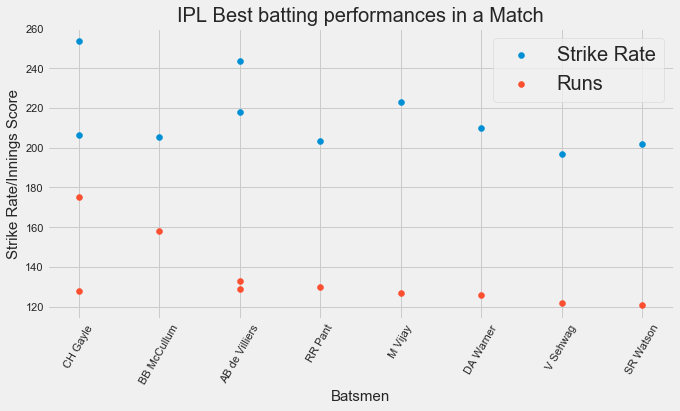

In [81]:
batting_ings=deliveries_data.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:10] 
batsman_ball_faced=deliveries_data.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,deliveries_data,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',batsmen_innings_req_2)
x=batsmen_innings_req_2['batsman']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Strike Rate/Innings Score',size=15)
plt.title('IPL Best batting performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Strike Rate','Runs'],prop={'size':20})

#### Top 10 highest wicket taker in an inning:

In [93]:
bowling_wickets=deliveries_data[deliveries_data['dismissal_kind']!='run out']
match_bowling_tot=bowling_wickets.groupby(['match_id','bowler']).apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
match_bowling_wick_count=match_bowling_tot.groupby(['match_id','bowler']).count().reset_index()
match_bowling_top=match_bowling_wick_count.sort_values(by='Wickets',ascending=False)
match_top_bowlers=match_bowling_top.loc[:,['match_id','bowler','Wickets']][0:10] 
match_bowling_runs=deliveries_data.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
match_bowler_performance=pd.merge(match_top_bowlers,match_bowling_runs,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
match_bowler_performance['Runs per Wicket']=match_bowler_performance['Runs Conceeded']/match_bowler_performance['Wickets']
bowler_innings=pd.merge(match_bowler_performance,deliveries_data,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
bowler_innings_req=bowler_innings.iloc[:,1:8]
bowler_innings_req_2=bowler_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',bowler_innings_req_2)
x=bowler_innings_req_2['bowler']
y1=bowler_innings_req_2['Wickets']
y2=bowler_innings_req_2['Runs per Wicket']
fig = go.Figure()
fig.add_trace(go.Scatter(x=bowler_innings_req_2['bowler'], y=bowler_innings_req_2['Wickets'],
                    mode='lines+markers',name='Wickets'))
fig.add_trace(go.Scatter(x=bowler_innings_req_2['bowler'], y=bowler_innings_req_2['Runs per Wicket'],
                    mode='lines+markers',name='R/W'))
fig.update_layout(title='Wickets in an single inning:')
fig.show()

The Top 10 Batting Performances in the IPL History are:
               bowler  Wickets  Runs Conceeded  Runs per Wicket  inning  \
0            A Zampa        6              19         3.166667       1   
24          A Joseph        6              18         3.000000       2   
48     Sohail Tanvir        6              15         2.500000       1   
72        AS Rajpoot        5              16         3.200000       1   
96        SL Malinga        5              13         2.600000       1   
119          B Kumar        5              20         4.000000       2   
144         A Mishra        5              17         3.400000       2   
168  Harbhajan Singh        5              18         3.600000       2   
193         MM Patel        5              25         5.000000       1   
217       JD Unadkat        5              30         6.000000       2   

    batting_team bowling_team  
0            SRH          RPS  
24           SRH           MI  
48           CSK           RR  


#### Batsman with highest strike rate(min. 1000 runs):

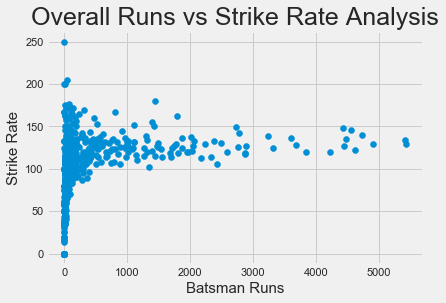

The Top 10 batsmen having highest strike rate, scoring atleast 1000 Runs:
             batsman  Runs  Strike Rate
34       AD Russell  1445   179.950187
374         RR Pant  1792   162.318841
153      GJ Maxwell  1403   155.543237
163       HH Pandya  1118   151.902174
189      JC Buttler  1431   150.000000
488        V Sehwag  2728   148.827059
26   AB de Villiers  4428   148.740343
92         CH Gayle  4560   145.640370
213      KA Pollard  2784   141.751527
112       DA Warner  4741   139.523249


In [98]:
min_run=1000
batting_tot=deliveries_data.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsman_balls_faced=deliveries_data.groupby('batsman').count()
batsman_balls_faced_count=batsman_balls_faced['ball'].reset_index(name='Balls Faced')
batsman_runs_balls=pd.merge(batting_tot,batsman_balls_faced_count,left_on='batsman',right_on='batsman',how='outer')
batsman_strike_rate=batsman_runs_balls.groupby(['batsman','Runs']).apply(lambda x:((x['Runs'])/(x['Balls Faced']))*100).reset_index(name='Strike Rate')
plt.scatter(batsman_strike_rate['Runs'],batsman_strike_rate['Strike Rate'])
plt.plot(np.mean(batsman_strike_rate['Strike Rate']),'r')
plt.xlabel('Batsman Runs',size=15)
plt.ylabel('Strike Rate',size=15)
plt.title('Overall Runs vs Strike Rate Analysis',size=25)
plt.show()
batsman_strike_rate_list=batsman_strike_rate.sort_values(by='Strike Rate',ascending=False)
batsman_strike_rate_above_target_runs=batsman_strike_rate_list[batsman_strike_rate_list['Runs']>=min_run]
top_strike_rate_batsman=batsman_strike_rate_above_target_runs.loc[:,['batsman','Runs','Strike Rate']][0:10]
print('The Top 10 batsmen having highest strike rate, scoring atleast {} Runs:\n'.format(min_run),top_strike_rate_batsman)


fig = go.Figure()
fig.add_trace(go.Scatter(x=top_strike_rate_batsman['batsman'], y=top_strike_rate_batsman['Strike Rate'],
                    mode='lines+markers'))
fig.update_layout(title='Top 10 Batsmen Strike Rate Analysis')
fig.show()


#### Bowlers with best economy(Min 1000 balls bowled):

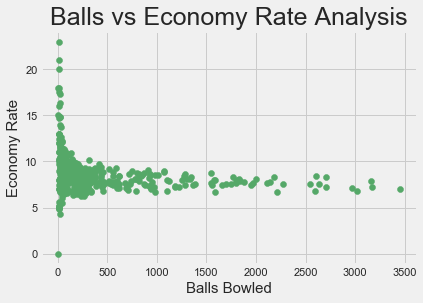

The Top 10 bowlers having best economy rate, bowling atleast 1000 balls:
               bowler  Balls Bowled  Economy Rate
108         DW Steyn          2207      6.671500
207   M Muralitharan          1581      6.698292
269         R Ashwin          3016      6.746021
347        SP Narine          2600      6.782308
301      Rashid Khan          1106      6.819168
126  Harbhajan Singh          3451      7.041437
340       SL Malinga          2974      7.083389
339         SK Warne          1223      7.187244
202         M Kartik          1182      7.197970
53           B Kumar          2707      7.234577


In [100]:
min_ball=1000
bowling_runs=deliveries_data.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls=deliveries_data.groupby('bowler').count()
bowled_balls=bowling_balls['ball'].reset_index(name='Balls Bowled')
bowler_stats=pd.merge(bowling_runs,bowled_balls,left_on='bowler',right_on='bowler',how='outer')
bowler_economy_rate=bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')
plt.scatter(bowler_economy_rate['Balls Bowled'],bowler_economy_rate['Economy Rate'],color='g')
plt.xlabel('Balls Bowled',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Balls vs Economy Rate Analysis',size=25)
plt.show()
bowler_best_economy_rate=bowler_economy_rate.sort_values(by='Economy Rate',ascending=True)
bowler_best_economy_rate_condition=bowler_best_economy_rate[bowler_best_economy_rate['Balls Bowled']>=min_ball]
top_10_economy=bowler_best_economy_rate_condition.loc[:,['bowler','Balls Bowled','Economy Rate']][0:10]
print('The Top 10 bowlers having best economy rate, bowling atleast {} balls:\n'.format(min_ball),top_10_economy)
fig = go.Figure()
fig.add_trace(go.Scatter(x=top_10_economy['bowler'], y=top_10_economy['Economy Rate'],
                    mode='lines+markers'))
fig.update_layout(title="Top 10 Bowler's Economy Analysis")
fig.show()
